In [93]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from notebooks.analytics.utils import init_analysis, savefig, set_save_folder

In [94]:
fed_avg = init_analysis("fed_avg_analyse_01")
fed_avg

,Unnamed: 0,validation_loss,validation_acc,epoch,mlflow.user,mlflow.source.name,mlflow.source.type,dataset,model_name,cluster_id,...,n_samples,mlflow.runName,start_time,end_time,artifact_uri,run_id,run_name,run_uuid,test_loss,test_acc
0,0,1.140046,0.559503,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,500,agreeable-goose-183,1687354553630,1687354555098,/usr/src/app/out/17c304bce9f24cd59efb3be0ec96a...,17c304bce9f24cd59efb3be0ec96a6c7,agreeable-goose-183,17c304bce9f24cd59efb3be0ec96a6c7,NaN,NaN
1,1,1.891420,0.430728,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,500,sedate-mare-597,1687354612815,1687354613703,/usr/src/app/out/fe42b23b6ff444c3b902a87b058fa...,fe42b23b6ff444c3b902a87b058fae5e,sedate-mare-597,fe42b23b6ff444c3b902a87b058fae5e,NaN,NaN
2,2,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,500,orderly-worm-680,1687354612145,1687354612738,/usr/src/app/out/fb12c24c7aee47bba0314ac70b1b3...,fb12c24c7aee47bba0314ac70b1b3581,orderly-worm-680,fb12c24c7aee47bba0314ac70b1b3581,3.329746,0.0000
3,3,2.065673,0.000000,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,500,rumbling-cub-19,1687354565015,1687354565945,/usr/src/app/out/b731d749ff4d42f18f2c7fb8ee99d...,b731d749ff4d42f18f2c7fb8ee99d4e5,rumbling-cub-19,b731d749ff4d42f18f2c7fb8ee99d4e5,NaN,NaN
4,4,1.682248,0.614565,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,500,useful-hound-525,1687354565003,1687354565965,/usr/src/app/out/26b7e2be6d41488b81fec5822c9aa...,26b7e2be6d41488b81fec5822c9aa7be,useful-hound-525,26b7e2be6d41488b81fec5822c9aa7be,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1638,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,500,indecisive-deer-32,1687354813981,1687354814509,/usr/src/app/out/f3b5e785635b4010824fb493fece5...,f3b5e785635b4010824fb493fece5045,indecisive-deer-32,f3b5e785635b4010824fb493fece5045,0.306311,0.9304
1639,1639,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,500,capricious-quail-250,1687354813979,1687354814442,/usr/src/app/out/06d7927960b34f58afc4cefd85d45...,06d7927960b34f58afc4cefd85d45782,capricious-quail-250,06d7927960b34f58afc4cefd85d45782,0.172396,0.9536
1640,1640,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,500,valuable-bass-123,1687354813978,1687354814461,/usr/src/app/out/e4632bcfde404d1b92303b29dcfb0...,e4632bcfde404d1b92303b29dcfb0222,valuable-bass-123,e4632bcfde404d1b92303b29dcfb0222,0.173616,0.9544
1641,1641,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,500,indecisive-sloth-518,1687354813976,1687354814373,/usr/src/app/out/3b2b7422735643a7ade7d6e5e4aba...,3b2b7422735643a7ade7d6e5e4aba4af,indecisive-sloth-518,3b2b7422735643a7ade7d6e5e4aba4af,0.695643,0.8368


In [95]:
start_time = fed_avg.start_time.min()
start_time

1687354553630

In [96]:
fed_avg.groupby("round_id")["end_time"].max() - start_time

round_id
0.0        1468
1.0       60073
2.0       62816
3.0       65129
4.0       67393
          ...  
98.0     254503
99.0     256389
100.0    258356
101.0    260177
102.0    260955
Name: end_time, Length: 103, dtype: int64

In [97]:
fed_avg.merge(fed_avg.groupby("round_id")["end_time"].max() - start_time, on="round_id")

,Unnamed: 0,validation_loss,validation_acc,epoch,mlflow.user,mlflow.source.name,mlflow.source.type,dataset,model_name,cluster_id,...,mlflow.runName,start_time,end_time_x,artifact_uri,run_id,run_name,run_uuid,test_loss,test_acc,end_time_y
0,0,1.140046,0.559503,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,agreeable-goose-183,1687354553630,1687354555098,/usr/src/app/out/17c304bce9f24cd59efb3be0ec96a...,17c304bce9f24cd59efb3be0ec96a6c7,agreeable-goose-183,17c304bce9f24cd59efb3be0ec96a6c7,NaN,NaN,1468
1,1,1.891420,0.430728,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,sedate-mare-597,1687354612815,1687354613703,/usr/src/app/out/fe42b23b6ff444c3b902a87b058fa...,fe42b23b6ff444c3b902a87b058fae5e,sedate-mare-597,fe42b23b6ff444c3b902a87b058fae5e,NaN,NaN,60073
2,2,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,orderly-worm-680,1687354612145,1687354612738,/usr/src/app/out/fb12c24c7aee47bba0314ac70b1b3...,fb12c24c7aee47bba0314ac70b1b3581,orderly-worm-680,fb12c24c7aee47bba0314ac70b1b3581,3.329746,0.0000,60073
3,3,2.065673,0.000000,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,rumbling-cub-19,1687354565015,1687354565945,/usr/src/app/out/b731d749ff4d42f18f2c7fb8ee99d...,b731d749ff4d42f18f2c7fb8ee99d4e5,rumbling-cub-19,b731d749ff4d42f18f2c7fb8ee99d4e5,NaN,NaN,60073
4,4,1.682248,0.614565,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,useful-hound-525,1687354565003,1687354565965,/usr/src/app/out/26b7e2be6d41488b81fec5822c9aa...,26b7e2be6d41488b81fec5822c9aa7be,useful-hound-525,26b7e2be6d41488b81fec5822c9aa7be,NaN,NaN,60073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1638,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,indecisive-deer-32,1687354813981,1687354814509,/usr/src/app/out/f3b5e785635b4010824fb493fece5...,f3b5e785635b4010824fb493fece5045,indecisive-deer-32,f3b5e785635b4010824fb493fece5045,0.306311,0.9304,260955
1639,1639,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,capricious-quail-250,1687354813979,1687354814442,/usr/src/app/out/06d7927960b34f58afc4cefd85d45...,06d7927960b34f58afc4cefd85d45782,capricious-quail-250,06d7927960b34f58afc4cefd85d45782,0.172396,0.9536,260955
1640,1640,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,valuable-bass-123,1687354813978,1687354814461,/usr/src/app/out/e4632bcfde404d1b92303b29dcfb0...,e4632bcfde404d1b92303b29dcfb0222,valuable-bass-123,e4632bcfde404d1b92303b29dcfb0222,0.173616,0.9544,260955
1641,1641,NaN,NaN,0.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,indecisive-sloth-518,1687354813976,1687354814373,/usr/src/app/out/3b2b7422735643a7ade7d6e5e4aba...,3b2b7422735643a7ade7d6e5e4aba4af,indecisive-sloth-518,3b2b7422735643a7ade7d6e5e4aba4af,0.695643,0.8368,260955


In [98]:
all = pd.DataFrame()
exp_i = [1, 2, 3, 4, 5, 7, 8, 9]
for i in exp_i:
    print(f"Loading {i}")
    exp = f"fed_avg_analyse_0{i}"
    fed_avg = init_analysis(exp)
    fed_avg["exp"] = exp
    fed_avg["epoch"] = fed_avg.epoch.max()
    start_time = fed_avg.start_time.min()
    fed_avg = fed_avg[fed_avg.test_acc.notnull()]
    fed_avg["n_trainers"] = fed_avg.loc[fed_avg.round_id == 1]["trainer_id"].count()
    fed_avg = fed_avg.merge(fed_avg.groupby("round_id")["end_time"].max() - start_time, on="round_id")
    all = pd.concat([all, fed_avg])

all["epoch"] += 1

Loading 1
Loading 2
Loading 3
Loading 4
Loading 5
Loading 7
Loading 8
Loading 9


In [99]:
all

,Unnamed: 0,validation_loss,validation_acc,epoch,mlflow.user,mlflow.source.name,mlflow.source.type,dataset,model_name,cluster_id,...,artifact_uri,run_id,run_name,run_uuid,test_loss,test_acc,exp,n_trainers,end_time_y,training_loss
0,2,NaN,NaN,1.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,/usr/src/app/out/fb12c24c7aee47bba0314ac70b1b3...,fb12c24c7aee47bba0314ac70b1b3581,orderly-worm-680,fb12c24c7aee47bba0314ac70b1b3581,3.329746,0.0000,fed_avg_analyse_01,8,59108,NaN
1,6,NaN,NaN,1.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,/usr/src/app/out/676140c65ba74fce9b8bfed14d2e7...,676140c65ba74fce9b8bfed14d2e78c1,loud-roo-534,676140c65ba74fce9b8bfed14d2e78c1,3.375780,0.0000,fed_avg_analyse_01,8,59108,NaN
2,7,NaN,NaN,1.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,/usr/src/app/out/478a3d1107454aa38b4fc6de0b361...,478a3d1107454aa38b4fc6de0b3615a4,orderly-fox-209,478a3d1107454aa38b4fc6de0b3615a4,3.660426,0.0000,fed_avg_analyse_01,8,59108,NaN
3,8,NaN,NaN,1.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,/usr/src/app/out/733c4f8745b84820b507f6dd646d2...,733c4f8745b84820b507f6dd646d2444,indecisive-ram-342,733c4f8745b84820b507f6dd646d2444,3.419492,0.0000,fed_avg_analyse_01,8,59108,NaN
4,13,NaN,NaN,1.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,/usr/src/app/out/f44af40cfcb14e5bb85260739d236...,f44af40cfcb14e5bb85260739d23670c,illustrious-worm-197,f44af40cfcb14e5bb85260739d23670c,2.632074,0.0656,fed_avg_analyse_01,8,59108,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,1625,NaN,NaN,10.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,/usr/src/app/out/d379168365f240c38d1380d609a20...,d379168365f240c38d1380d609a20a5b,shivering-hen-512,d379168365f240c38d1380d609a20a5b,0.488269,0.8800,fed_avg_analyse_09,8,1528845,NaN
817,1626,NaN,NaN,10.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,/usr/src/app/out/f9d44ab033ab4cd8965753cc2858a...,f9d44ab033ab4cd8965753cc2858a926,mercurial-ray-844,f9d44ab033ab4cd8965753cc2858a926,0.087127,0.9760,fed_avg_analyse_09,8,1528845,NaN
818,1627,NaN,NaN,10.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,/usr/src/app/out/c9975f9ad1dc4cc597938d4157489...,c9975f9ad1dc4cc597938d41574894af,worried-lynx-56,c9975f9ad1dc4cc597938d41574894af,0.073838,0.9616,fed_avg_analyse_09,8,1528845,NaN
819,1628,NaN,NaN,10.0,root,./src/fed_avg/bootstrap_fed_avg.py,LOCAL,mnist,lenet,global,...,/usr/src/app/out/faf03cd987a0455f981bec6a4daf5...,faf03cd987a0455f981bec6a4daf5991,amazing-gull-6,faf03cd987a0455f981bec6a4daf5991,0.048109,0.9888,fed_avg_analyse_09,8,1528845,NaN


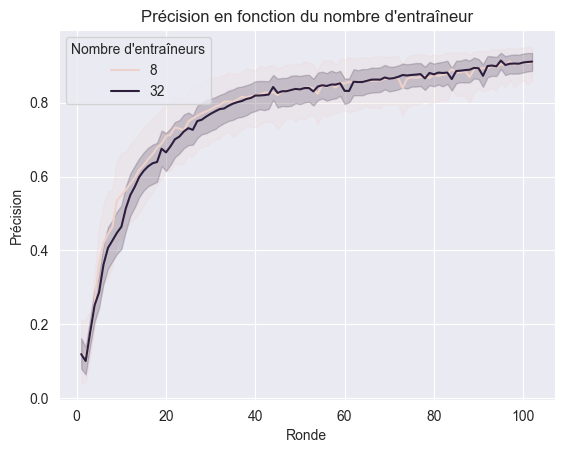

In [106]:
ax = sns.lineplot(all, x="round_id", y="test_acc", hue="n_trainers")
ax.set_title("Précision en fonction du nombre d'entraîneur")
ax.set_ylabel("Précision")
ax.set_xlabel("Ronde")
ax.legend(title="Nombre d'entraîneurs")
plt.show()

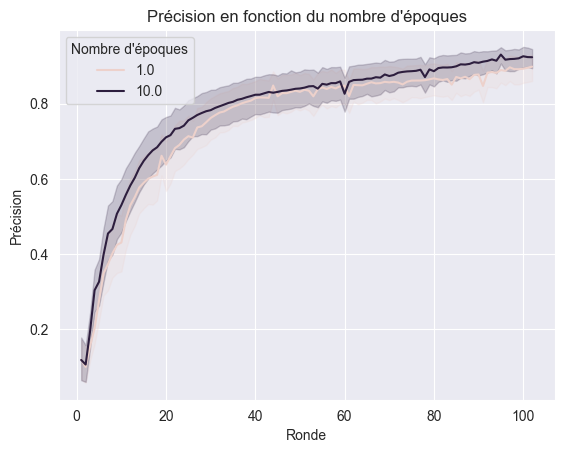

In [108]:
ax = sns.lineplot(all, x="round_id", y="test_acc", hue="epoch")
ax.set_title("Précision en fonction du nombre d'époques")
ax.set_ylabel("Précision")
ax.set_xlabel("Ronde")
ax.legend(title="Nombre d'époques")
plt.show()

In [102]:
epoch_series = all.merge(all.groupby(["round_id", "epoch"])["end_time_y"].max(), on=["round_id", "epoch"])
epoch_series.columns

Index(['Unnamed: 0', 'validation_loss', 'validation_acc', 'epoch',
       'mlflow.user', 'mlflow.source.name', 'mlflow.source.type', 'dataset',
       'model_name', 'cluster_id', 'round_id', 'trainer_id', 'test',
       'balanced', 'partition_index', 'n_partitions', 'mean', 'std',
       'n_samples', 'mlflow.runName', 'start_time', 'end_time_x',
       'artifact_uri', 'run_id', 'run_name', 'run_uuid', 'test_loss',
       'test_acc', 'exp', 'n_trainers', 'end_time_y_x', 'training_loss',
       'end_time_y_y'],
      dtype='object')

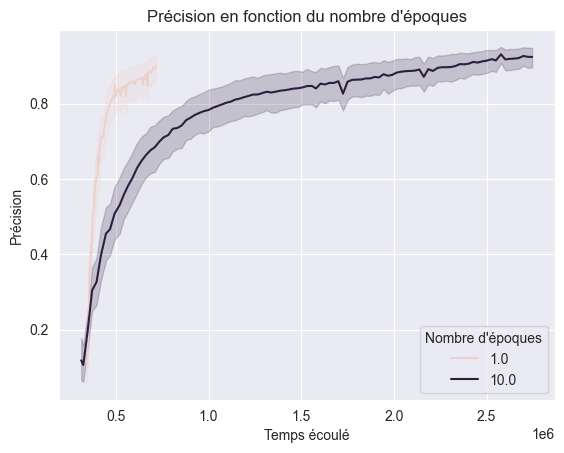

In [115]:
ax = sns.lineplot(epoch_series, x="end_time_y_y", y="test_acc", hue="epoch")
ax.set_title("Précision en fonction du nombre d'époques")
ax.set_ylabel("Précision")
ax.set_xlabel("Temps écoulé")
ax.legend(title="Nombre d'époques")
plt.show()

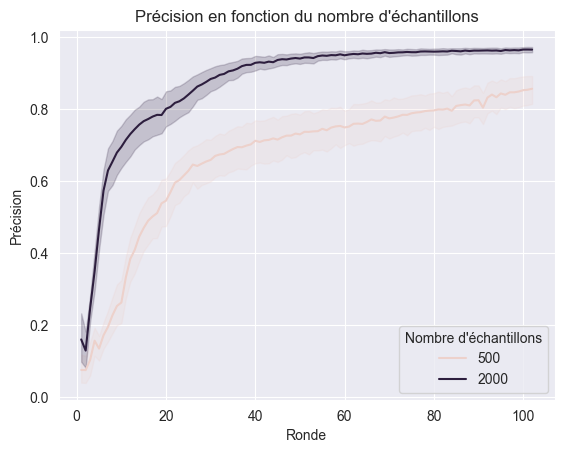

In [111]:
ax = sns.lineplot(all, x="round_id", y="test_acc", hue="n_samples")
ax.set_title("Précision en fonction du nombre d'échantillons")
ax.set_ylabel("Précision")
ax.set_xlabel("Ronde")
ax.legend(title="Nombre d'échantillons")
plt.show()

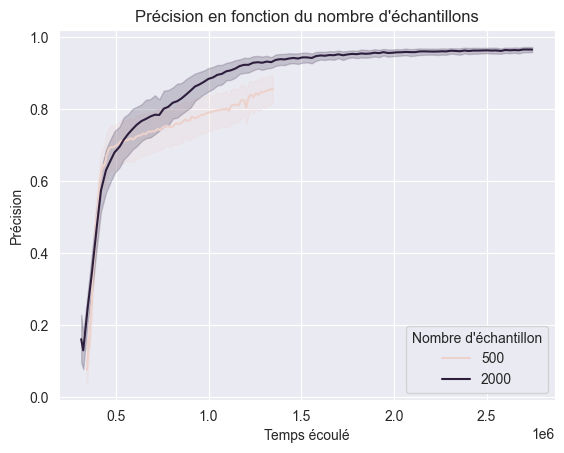

In [112]:
n_samples_samples = all.merge(all.groupby(["round_id", "n_samples"])["end_time_y"].max(), on=["round_id", "n_samples"])
epoch_series.columns

ax = sns.lineplot(n_samples_samples, x="end_time_y_y", y="test_acc", hue="n_samples")
ax.set_title("Précision en fonction du nombre d'échantillons")
ax.set_ylabel("Précision")
ax.set_xlabel("Temps écoulé")
ax.legend(title="Nombre d'échantillon")
plt.show()